<a href="https://colab.research.google.com/github/YNWA-Algo/Smoking-Walking-Policy/blob/main/Walkability_%26_Smoke_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hypothesis**:  You can counter the impact of smoking on life expectancy by living in a walkable city. Statisically speaking, there is a statistically significant difference in life expectancy of a smoker of similar profile in walkbale city vs non-walkable city.

**Individual:** Do you smoke but want to live a long life? Then live in a city where walking is a way of life. Walking negates the bad effects of smoking. It cancels out adverse impact on life expectancy

**Government and Policy Makers:** Should policy makers focus on banning smoking all together (e.g NZ) or focus on policy that aids the redesign of cities?



Data Collection Planning:

1. What countries in europe have the most walkable cities ?

2. What countries in europe have the highest/ lowest number or % of smokers ?
[to answer this question, I used/ found data related to % of daily smokers by country]
3. What is the death-toll by country due to smoking?And is there change
  overtime overall and by country (Y) ?

4. What is the life expectancy by country and by cities within countries (Y) ?

# Fetching the datasets

**Data Set 1/n - Walkability Data**

https://www.tandfonline.com/doi/full/10.1080/17445647.2022.2141143

Data set 1 (link): https://figshare.com/articles/dataset/Supp_Mat_Data_JoM_xls/19698496

In [ ]:
## Get walkability data across europe

**Data Set 1/n - Life expectancy at birth across the globe (Kaggle)**

Mount my google drive and connect to the data directly from Kaggle into my working directory without moving the files back and forth.

Data Source - https://www.kaggle.com/datasets/iamsouravbanerjee/life-expectancy-at-birth-across-the-globe

In [ ]:
 pip install kaggle

**Importing Libraries:**
    Connect to Colab using the specified library.

*   Pandas - for data manupulation through dataframes
*   Numpy - for various numerical computations
*   Seaborn - for visualizing the dataset


These libraries facilitate data uploading and exploration, ensuring that the dataset aligns with the desired objectives.

**Autoviz for Exploratory Data Analysis (EDA):**

    AutoViz to swiftly generate diverse visualizations to start to get a sense

*   AutoViz to swiftly generate diverse visulization to get a sense of the shape of the dataset


In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
from google.colab import autoviz
import seaborn as sns

Upload the Kaggle json API file -> key to fetching the dataset from Kaggle

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"isaiaholateru","key":"542abed50e95ce210edde74d1b79a7f3"}'}

Make a folder in user directory

In [ ]:
!mkdir ~/.kaggle

In [ ]:
# Copy Kaggle Api credentials to the folder created above
!cp kaggle.json ~/.kaggle/

In [ ]:
#Change Permission so that i will be the only one with ability to read/write
! chmod 600 ~/.kaggle/kaggle.json

We are now "hooked in" to read/download the data from Kaggle. Next is to download the specific dataset we need for our hypothesis test

In [ ]:
! kaggle datasets download iamsouravbanerjee/life-expectancy-at-birth-across-the-globe

  0% 0.00/25.1k [00:00<?, ?B/s]
100% 25.1k/25.1k [00:00<00:00, 36.6MB/s]


In [ ]:
# the file is zipped. Uzip it
! unzip /content/life-expectancy-at-birth-across-the-globe.zip

Archive:  /content/life-expectancy-at-birth-across-the-globe.zip
  inflating: Life Expectancy at Birth.csv  


In [ ]:
#Save the dataset into an object
lifexpdataset = pd.read_csv("/content/Life Expectancy at Birth.csv", encoding_errors ='ignore')

Review the data - scan it

In [ ]:
# call the object (with Autoviz intalled we can quickly check out the data set)
lifexpdataset

,ISO3,Country,Continent,Hemisphere,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Life Expectancy at Birth (1990),Life Expectancy at Birth (1991),Life Expectancy at Birth (1992),...,Life Expectancy at Birth (2012),Life Expectancy at Birth (2013),Life Expectancy at Birth (2014),Life Expectancy at Birth (2015),Life Expectancy at Birth (2016),Life Expectancy at Birth (2017),Life Expectancy at Birth (2018),Life Expectancy at Birth (2019),Life Expectancy at Birth (2020),Life Expectancy at Birth (2021)
0,AFG,Afghanistan,Asia,Northern Hemisphere,Low,SA,180.0,45.9672,46.6631,47.5955,...,61.9230,62.4167,62.5451,62.6587,63.1361,63.0160,63.0810,63.5645,62.5751,61.9824
1,AGO,Angola,Africa,Southern Hemisphere,Medium,SSA,148.0,41.8933,43.8127,42.2088,...,58.6231,59.3074,60.0397,60.6546,61.0923,61.6798,62.1438,62.4484,62.2612,61.6434
2,ALB,Albania,Europe,Northern Hemisphere,High,ECA,67.0,73.1439,73.3776,73.7148,...,78.0640,78.1226,78.4075,78.6441,78.8602,79.0473,79.1838,79.2825,76.9893,76.4626
3,AND,Andorra,Europe,Northern Hemisphere,Very High,NaN,40.0,78.4063,77.9805,80.3241,...,82.9166,82.9343,82.9483,82.9534,82.9671,82.9803,82.9923,83.0039,79.0234,80.3684
4,ARE,United Arab Emirates,Asia,Northern Hemisphere,Very High,AS,26.0,71.9004,72.2414,72.3062,...,78.7155,78.8528,79.0442,79.2232,79.3347,79.5036,79.6274,79.7262,78.9457,78.7104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,WSM,Samoa,Oceania,Southern Hemisphere,High,EAP,111.0,67.6584,67.8814,68.3855,...,72.1668,72.3915,72.4628,72.5146,72.5397,72.5900,72.6358,72.1572,72.7677,72.7675
191,YEM,Yemen,Asia,Northern Hemisphere,Low,AS,183.0,58.6994,59.0490,59.4283,...,67.3429,67.5451,67.3842,65.8734,66.0641,65.9573,64.5751,65.0917,64.6501,63.7534
192,ZAF,South Africa,Africa,Southern Hemisphere,High,SSA,109.0,63.3753,63.2649,63.3414,...,61.8457,62.5331,63.3796,63.9499,64.7469,65.4020,65.6743,66.1750,65.2522,62.3410
193,ZMB,Zambia,Africa,Southern Hemisphere,Medium,SSA,154.0,47.9263,47.0971,46.5119,...,58.8672,59.8777,60.6990,61.2078,61.7937,62.1201,62.3422,62.7926,62.3803,61.2234


In [ ]:
# get information on the data- what types of data, any Nulls ?
lifexpdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ISO3                             195 non-null    object 
 1   Country                          195 non-null    object 
 2   Continent                        195 non-null    object 
 3   Hemisphere                       195 non-null    object 
 4   Human Development Groups         191 non-null    object 
 5   UNDP Developing Regions          151 non-null    object 
 6   HDI Rank (2021)                  191 non-null    float64
 7   Life Expectancy at Birth (1990)  195 non-null    float64
 8   Life Expectancy at Birth (1991)  195 non-null    float64
 9   Life Expectancy at Birth (1992)  195 non-null    float64
 10  Life Expectancy at Birth (1993)  195 non-null    float64
 11  Life Expectancy at Birth (1994)  195 non-null    float64
 12  Life Expectancy at Bir

In [ ]:
lifexpdataset.describe()

,HDI Rank (2021),Life Expectancy at Birth (1990),Life Expectancy at Birth (1991),Life Expectancy at Birth (1992),Life Expectancy at Birth (1993),Life Expectancy at Birth (1994),Life Expectancy at Birth (1995),Life Expectancy at Birth (1996),Life Expectancy at Birth (1997),Life Expectancy at Birth (1998),...,Life Expectancy at Birth (2012),Life Expectancy at Birth (2013),Life Expectancy at Birth (2014),Life Expectancy at Birth (2015),Life Expectancy at Birth (2016),Life Expectancy at Birth (2017),Life Expectancy at Birth (2018),Life Expectancy at Birth (2019),Life Expectancy at Birth (2020),Life Expectancy at Birth (2021)
count,191.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,95.811518,64.596583,64.729711,64.734149,64.955027,65.262238,65.410569,65.622842,65.825234,65.864002,...,70.742479,71.029231,71.287446,71.511704,71.823067,72.069328,72.292908,72.505775,71.813544,71.276330
std,55.307333,10.102225,10.311808,10.582665,10.378498,10.443104,10.080049,10.151753,10.215914,10.627165,...,8.432951,8.316052,8.241010,8.049081,7.913379,7.812799,7.708096,7.637005,7.528341,7.746488
min,1.000000,29.935300,26.564700,22.724500,22.704100,14.098500,30.948300,31.296600,32.242400,18.385200,...,47.835400,49.002400,50.032700,51.101400,52.042700,52.305200,52.553600,52.910400,52.777400,52.525400
25%,48.500000,58.675500,59.051850,57.631950,57.959100,58.585050,59.327700,59.310500,59.996100,59.897200,...,64.364150,64.326350,64.604600,65.210800,65.711150,65.978000,66.278450,66.519900,66.028150,65.672500
50%,96.000000,67.658400,67.881400,67.783000,67.719500,67.884600,68.169900,68.749300,68.884100,69.099600,...,72.453600,72.704400,72.853300,72.983000,73.111600,73.374300,73.530600,73.469600,72.513200,71.694000
75%,143.500000,71.933450,72.137450,72.379750,72.542950,72.740000,72.755300,73.203100,73.226950,73.419950,...,77.085850,77.183600,77.430750,77.608100,77.811300,77.859850,77.914400,77.985100,77.403650,76.699300
max,191.000000,78.983800,79.251900,80.324100,79.434200,82.638000,79.670200,80.349300,80.943900,80.640200,...,84.529300,84.865600,84.880400,85.258500,85.722800,85.652500,86.464300,86.542400,86.538000,85.946300


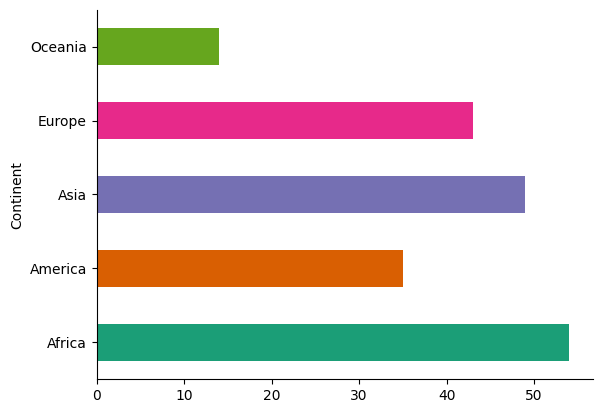

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
lifeexpdataset.groupby('Continent').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

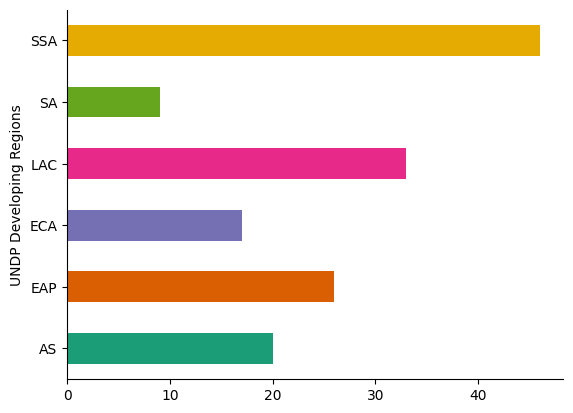

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
lifeexpdataset.groupby('UNDP Developing Regions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

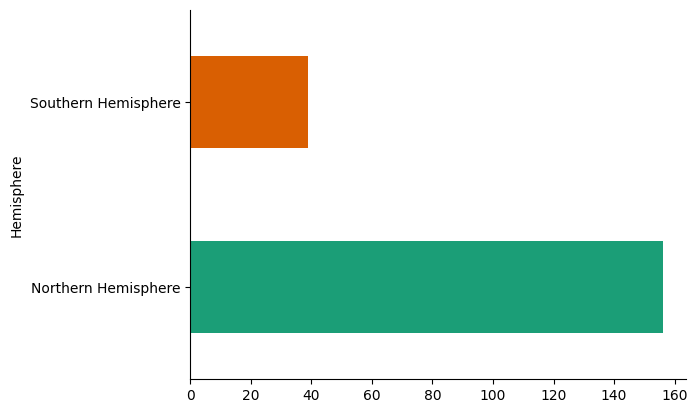

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
lifeexpdataset.groupby('Hemisphere').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

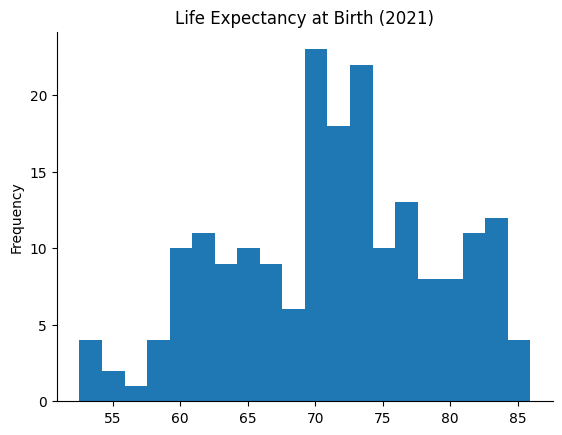

In [ ]:
from matplotlib import pyplot as plt
lifeexpdataset['Life Expectancy at Birth (2021)'].plot(kind='hist', bins=20, title='Life Expectancy at Birth (2021)')
plt.gca().spines[['top', 'right',]].set_visible(False)

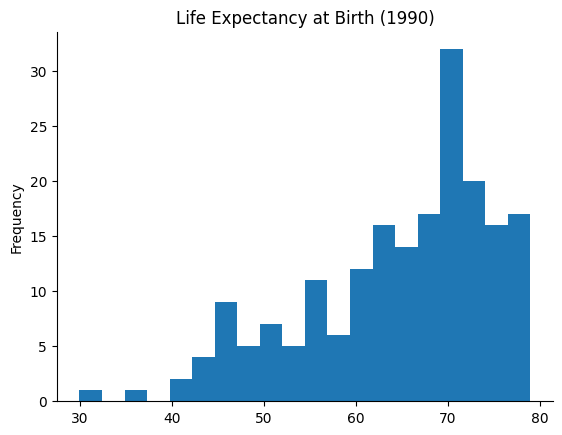

In [ ]:
from matplotlib import pyplot as plt
lifeexpdataset['Life Expectancy at Birth (1990)'].plot(kind='hist', bins=20, title='Life Expectancy at Birth (1990)')
plt.gca().spines[['top', 'right',]].set_visible(False)

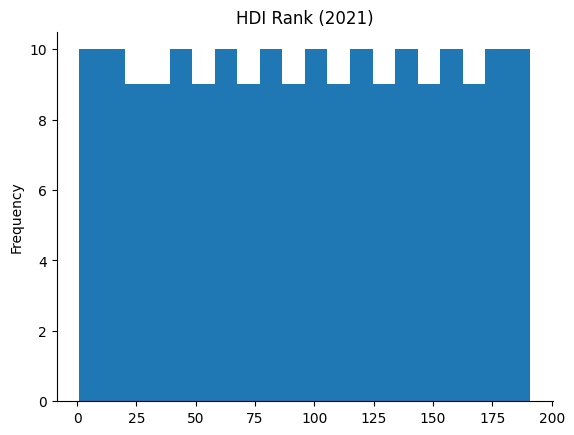

In [ ]:
from matplotlib import pyplot as plt
lifeexpdataset['HDI Rank (2021)'].plot(kind='hist', bins=20, title='HDI Rank (2021)')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Data Set 1/n - Smoking Data**

In [37]:
# Fetching data related to % deaths related to smoking from our world in data (OWID). API access instructions https://docs.owid.io/projects/etl/api/python/
!pip install owid-catalog  # API access to the data set to search the OWID data store for the dataset set needed

In [44]:
#import owid.Catalog module
from owid import catalog


In [6]:
#Use find(query) method to search catalog for the smoking dataset needed
catalog.find("smoking").head()

,table,dataset,version,namespace,channel,is_public,dimensions,path,formats
2375,all_causes__smoking__both_sexes__15_49_years,gbd_risk,2019,ihme_gbd,garden,True,"[country, year]",garden/ihme_gbd/2019/gbd_risk/all_causes__smok...,[feather]
2376,all_causes__smoking__both_sexes__50_69_years,gbd_risk,2019,ihme_gbd,garden,True,"[country, year]",garden/ihme_gbd/2019/gbd_risk/all_causes__smok...,[feather]
2377,all_causes__smoking__both_sexes__5_14_years,gbd_risk,2019,ihme_gbd,garden,True,"[country, year]",garden/ihme_gbd/2019/gbd_risk/all_causes__smok...,[feather]
2378,all_causes__smoking__both_sexes__70plus_years,gbd_risk,2019,ihme_gbd,garden,True,"[country, year]",garden/ihme_gbd/2019/gbd_risk/all_causes__smok...,[feather]
2379,all_causes__smoking__both_sexes__age_standardized,gbd_risk,2019,ihme_gbd,garden,True,"[country, year]",garden/ihme_gbd/2019/gbd_risk/all_causes__smok...,[feather]


In [45]:
#from the list of 5 datasets above, I want the standardized data set across ages 2379 index; call on row 4 in the frame of the table above to view the table.
results = catalog.find("smoking")
df = results.iloc[4].load()
df.head(5)


share_of_total_dalys_that_are_from_all_causes_attributed_to_smoking__in_both_sexes_aged_age_standardized  \
country     year                                                                                                             
Afghanistan 1990                                           2.269707                                                          
            1991                                           2.344513                                                          
            1992                                           2.448477                                                          
            1993                                           2.467491                                                          
            1994                                           2.420888                                                          

                  share_of_total_deaths_that_are_from_all_causes_attributed_to_smoking__in_both_sexes_aged_age_standardized  \
country     year                                                                                                              
Afghanistan 1990                                           4.018696                                                           
            1991                                           4.070636                                                           
            1992                                           4.180628                                                           
            1993                                           4.213862                                                           
            1994                                           4.160192                                                           

                  dalys_from_all_causes_attributed_to_smoking_per_100_000_people_in__both_sexes_aged_age_standardized  \
country     year                                                                                                        
Afghanistan 1990                                        1962.267700                                                     
            1991                                        1957.001465                                                     
            1992                                        1958.378784                                                     
            1993                                        1983.684082                                                     
            1994                                        2020.245972                                                     

                  deaths_that_are_from_all_causes_attributed_to_smoking_per_100_000_people__in_both_sexes_aged_age_standardized  
country     year                                                                                                                 
Afghanistan 1990                                          75.837692                                                              
            1991                                          75.635269                                                              
            1992                                          75.661049                                                              
            1993                                          76.533630                                                              
            1994                                          77.781418

The dataframe above df = results... is in feather format; Action->convert to CSV and upload into the working folder for this project

In [29]:
#import pyarrow feather and Pandas library needed for the conversation from feather to CSV format and upload
import pyarrow.feather as feather
import pandas as pd


#Specify the path to save the CSV file
csv_path = "/content/Walkability & Smoke Analysis/OWD_Smokedeath.csv"


#save the dataframe to CSV format
df.to_csv(csv_path, index=False)


#Print a message to confirm the successful save
print(f"DataFrame saved to {csv_path}")

DataFrame saved to /content/Walkability & Smoke Analysis/OWD_Smokedeath.csv


**Data Set 1/n - Smoke Rates by Country; Ages 15+**

# New Section